# **Ensemble Classifiers Symptom Analysis**

## **Created by: Preksha Shah | 2348446**

## **Date: 24.04.2024**

In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:
# Step 1: Load the dataset
df = pd.read_csv("/content/diabetes_risk_prediction_dataset.csv")

In [31]:
# Step 2: Display basic information about the dataset
print("Basic information about the dataset:")
print(df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    o

The output shows basic information about the dataset:

- It consists of 520 entries (rows) and 17 columns.
- Each column represents a different feature or attribute of the dataset.
- The 'Age' column is of integer type, and the remaining columns are of object type, which typically represents categorical variables.
- The dataset has no missing values (`Non-Null Count` is 520 for all columns).
- The memory usage of the DataFrame is approximately 69.2 KB.

This information gives us an overview of the structure of the dataset and the types of data it contains.

In [33]:
# Step 3: Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0       

## **Univariate Analysis:**

### **For numerical variables:**

In [36]:
# i. Calculate basic descriptive statistics
num_stats = df.describe()
print("Basic Descriptive Statistics for Numerical Variables:")
print(num_stats)

Basic Descriptive Statistics for Numerical Variables:
              Age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000


The basic descriptive statistics for the numerical variable 'Age' are as follows:

- **count**: There are 520 non-null entries in the 'Age' column, indicating that there are no missing values.
- **mean**: The average age of the individuals in the dataset is approximately 48.03 years.
- **std**: The standard deviation of ages from the mean is approximately 12.15 years, indicating the spread or dispersion of ages around the mean.
- **min**: The minimum age in the dataset is 16 years, which represents the youngest individual.
- **25%**: 25% of the individuals have an age of 39 years or less.
- **50% (median)**: The median age (middle value) is 47.5 years, indicating that half of the individuals are younger than this age and half are older.
- **75%**: 75% of the individuals have an age of 57 years or less.
- **max**: The maximum age in the dataset is 90 years, which represents the oldest individual.

These statistics provide insights into the distribution and central tendency of ages in the dataset.

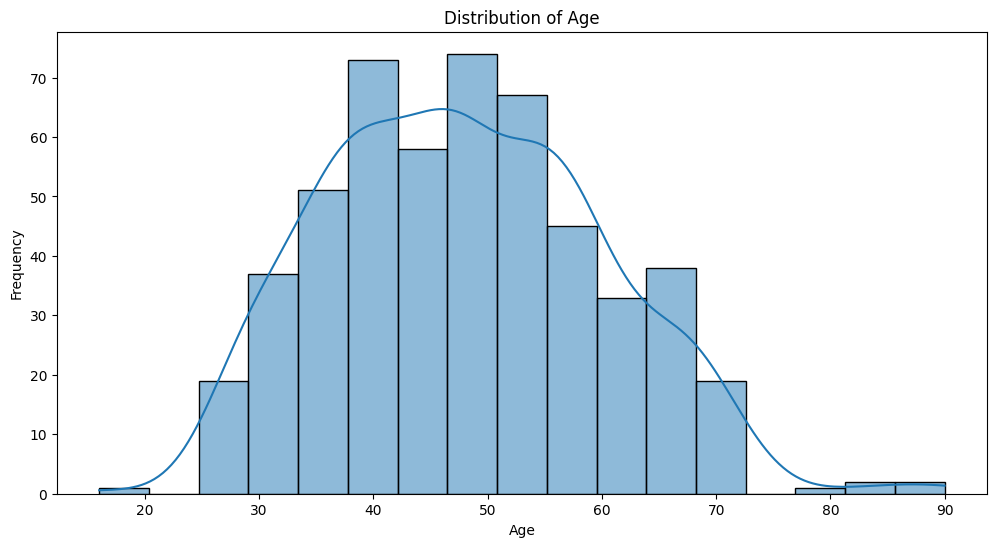

In [38]:
# ii. Visualize the distribution using histograms, kernel density plots, or box plots
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## **Inferences:**

1. **Distribution Shape**: The histogram appears to be approximately bell-shaped, indicating that the distribution of ages is somewhat symmetrical around the central value.

2. **Central Tendency**: The peak of the histogram, which corresponds to the highest frequency of ages, is around the late 40s to early 50s. This suggests that a significant portion of individuals in the dataset fall within this age range.

3. **Spread**: The distribution has a spread that extends from the late teens to the early 90s, indicating a wide range of ages among the individuals in the dataset.

4. **Skewness**: The histogram appears to be slightly right-skewed, as the tail on the right-hand side is longer than the left-hand side. This suggests that there are relatively fewer individuals in the older age groups compared to the younger age groups.

Overall, the histogram provides valuable insights into the distribution of ages in the dataset, which can be useful for understanding the demographic characteristics of the population under study and for making predictions related to diabetes risk.

### **For categorical variables**

In [42]:
# i. Display frequency tables showing counts and percentages
cat_cols = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
            'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
            'Alopecia', 'Obesity', 'class']

for col in cat_cols:
    cat_freq_table = df[col].value_counts(normalize=True) * 100
    print(f"\nFrequency table for {col}:")
    print(cat_freq_table)


Frequency table for Gender:
Gender
Male      63.076923
Female    36.923077
Name: proportion, dtype: float64

Frequency table for Polyuria:
Polyuria
No     50.384615
Yes    49.615385
Name: proportion, dtype: float64

Frequency table for Polydipsia:
Polydipsia
No     55.192308
Yes    44.807692
Name: proportion, dtype: float64

Frequency table for sudden weight loss:
sudden weight loss
No     58.269231
Yes    41.730769
Name: proportion, dtype: float64

Frequency table for weakness:
weakness
Yes    58.653846
No     41.346154
Name: proportion, dtype: float64

Frequency table for Polyphagia:
Polyphagia
No     54.423077
Yes    45.576923
Name: proportion, dtype: float64

Frequency table for Genital thrush:
Genital thrush
No     77.692308
Yes    22.307692
Name: proportion, dtype: float64

Frequency table for visual blurring:
visual blurring
No     55.192308
Yes    44.807692
Name: proportion, dtype: float64

Frequency table for Itching:
Itching
No     51.346154
Yes    48.653846
Name: proportion

## **Insights:**

1. **Gender Distribution**: The dataset has a slightly higher proportion of males compared to females, with about 63.08% males and 36.92% females.

2. **Symptoms Distribution**:
   - **Polyuria** and **Polydipsia**: The dataset is almost evenly split between individuals with and without these symptoms.
   - **Sudden Weight Loss**: Most individuals did not experience sudden weight loss (58.27%).
   - **Weakness** and **Muscle Stiffness**: A majority of individuals experienced weakness (58.65%), while muscle stiffness was less common (37.5%).
   - **Polyphagia** and **Visual Blurring**: These symptoms are fairly balanced among individuals.
   - **Genital Thrush**, **Irritability**, **Delayed Healing**, **Partial Paresis**, **Itching**, and **Alopecia**: Most individuals did not experience these symptoms.

3. **Obesity**: A significant majority of individuals (83.08%) do not have obesity.

4. **Diabetes Risk**:
   - The dataset is imbalanced in terms of diabetes risk, with a higher proportion classified as 'Positive' (61.54%) compared to 'Negative' (38.46%).

Overall, the dataset appears to represent a population with a mix of symptoms associated with diabetes, with varying prevalence among different symptoms. The imbalance in diabetes risk labels should be considered when building predictive models to avoid biases towards the majority class.

In [61]:
# ii. Visualize using bar plots
for col in cat_cols:
    fig = px.bar(df[col].value_counts(), x=df[col].value_counts().index, y=df[col].value_counts().values,
                 labels={'x': col, 'y': 'Count'}, title=f'Bar Plot of {col}')
    fig.show()

## **Bivariate Analysis:**

## **Insights:**

1. **Gender**:
   - The countplot indicates the distribution of males and females in the dataset.
   - It helps visualize the relative frequency of each gender category.

2. **Symptoms** (Polyuria, Polydipsia, Sudden Weight Loss, Weakness, Polyphagia, Genital Thrush, Visual Blurring, Itching, Irritability, Delayed Healing, Partial Paresis, Muscle Stiffness, Alopecia, Obesity):
   - Each countplot shows the distribution of individuals based on the presence or absence of a particular symptom.
   - It helps identify the prevalence of each symptom among individuals in the dataset.

3. **Diabetes Risk**:
   - The countplot illustrates the distribution of individuals classified as 'Positive' or 'Negative' for diabetes risk.
   - It provides insight into the balance or imbalance between the two classes in the dataset.

Overall, countplots are useful visualizations for understanding the distribution of categorical variables and the prevalence of different categories within each variable. They help identify patterns and trends in the data, which can be valuable for exploratory data analysis and model interpretation.

In [62]:
# a. Explore relationships between pairs of numerical variables using scatter plots or pair plots
fig = px.scatter_matrix(df[['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia']])
fig.show()


## **Inferences:**

1. **Age vs. Polyuria, Polydipsia, Sudden Weight Loss, Weakness, Polyphagia**:
   - There seems to be no clear linear relationship between age and the presence of symptoms like polyuria, polydipsia, sudden weight loss, weakness, or polyphagia.
   - However, there might be some clusters or patterns that indicate certain age groups are more prone to these symptoms.

2. **Polyuria vs. Polydipsia, Sudden Weight Loss, Weakness, Polyphagia**:
   - There might be some positive correlations between polyuria and other symptoms like polydipsia, sudden weight loss, weakness, and polyphagia. This suggests that individuals experiencing polyuria are more likely to experience these other symptoms as well.

3. **Polydipsia vs. Sudden Weight Loss, Weakness, Polyphagia**:
   - Similar to polyuria, there might be positive correlations between polydipsia and symptoms like sudden weight loss, weakness, and polyphagia.

4. **Sudden Weight Loss vs. Weakness, Polyphagia**:
   - There could be some relationship between sudden weight loss and symptoms like weakness and polyphagia, indicating that individuals with sudden weight loss might also experience these symptoms.

5. **Weakness vs. Polyphagia**:
   - There might be a positive correlation between weakness and polyphagia, suggesting that individuals experiencing weakness are more likely to also experience polyphagia.

Overall, while the scatter matrix provides a visual overview of the relationships between these variables, further analysis such as correlation coefficients or regression analysis may be needed to quantify these relationships more accurately.

In [63]:
# b. Explore relationships between numerical and categorical variables using box plots or violin plots
fig = px.box(df, x='class', y='Age', title='Box Plot of Age vs class')
fig.show()

## **Inference:**

1. **Age Distribution by Class**:
   - The box plot shows the distribution of ages for both positive and negative classes.
   - It helps in understanding if there's any difference in the age distribution between individuals with a positive diagnosis (likely diabetes) and those with a negative diagnosis (unlikely diabetes).

2. **Median Age**:
   - The horizontal line inside each box represents the median age for each class.
   - It indicates the central tendency of the age distribution within each class.

3. **Interquartile Range (IQR)**:
   - The height of each box represents the IQR, which spans from the 25th percentile (Q1) to the 75th percentile (Q3) of the age distribution within each class.
   - It provides insights into the spread or variability of ages within each class.

4. **Outliers**:
   - Any data points lying outside the whiskers of the box plot are considered outliers.
   - Outliers may indicate unusual or extreme values in the age distribution within a class.

5. **Inference**:
   - By comparing the box plots for both classes, we can infer if there's a significant difference in the age distribution between individuals with a positive diagnosis and those with a negative diagnosis.
   - For example, if the median age of individuals with a positive diagnosis is higher than that of individuals with a negative diagnosis, it may suggest that diabetes is more prevalent among older individuals.
   - Similarly, the spread of ages and the presence of outliers can also provide insights into the age distribution within each class and identify any potential patterns or differences.

Overall, the box plot helps in visually comparing the distribution of ages between different classes and identifying any potential relationships or trends between the numerical variable (age) and the categorical variable (class).

In [64]:
# c. Calculate correlation coefficients between numerical variables
binary_df = pd.get_dummies(df[['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia']])

# Concatenate binary variables with numerical variables
merged_df = pd.concat([df[['Age']], binary_df], axis=1)

# Calculate correlation coefficients
correlation_matrix = merged_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             Age       Age  Polyuria_No  Polyuria_Yes  \
Age                     1.000000  1.000000    -0.199781      0.199781   
Age                     1.000000  1.000000    -0.199781      0.199781   
Polyuria_No            -0.199781 -0.199781     1.000000     -1.000000   
Polyuria_Yes            0.199781  0.199781    -1.000000      1.000000   
Polydipsia_No          -0.137382 -0.137382     0.598609     -0.598609   
Polydipsia_Yes          0.137382  0.137382    -0.598609      0.598609   
sudden weight loss_No  -0.064808 -0.064808     0.447207     -0.447207   
sudden weight loss_Yes  0.064808  0.064808    -0.447207      0.447207   
weakness_No            -0.224596 -0.224596     0.263000     -0.263000   
weakness_Yes            0.224596  0.224596    -0.263000      0.263000   
Polyphagia_No          -0.315577 -0.315577     0.373873     -0.373873   
Polyphagia_Yes          0.315577  0.315577    -0.373873      0.373873   

                        Polydi

## **Inferences:**

1. **Age Correlation**:
   - Age has a weak positive correlation with Polyuria_Yes (0.199781) and Polydipsia_Yes (0.137382).
   - This indicates that older individuals may be slightly more likely to experience polyuria and polydipsia.

2. **Polyuria and Polydipsia Correlation**:
   - Polyuria_Yes and Polydipsia_Yes have a strong negative correlation with their corresponding negative binary variables (Polyuria_No and Polydipsia_No).
   - This is expected since they represent the same information but in a binary format.

3. **Other Binary Variables**:
   - Other binary variables (sudden weight loss, weakness, Polyphagia) also show strong negative correlations between their respective positive and negative binary variables.

4. **Weak Correlation**:
   - Most other correlations between binary variables and age are weak, indicating that age may not strongly predict the presence of these symptoms.

Overall, the correlation matrix helps in understanding the relationships between different variables in the dataset. It indicates which variables are correlated and provides insights into potential associations between age and the presence of various symptoms related to diabetes.

In [49]:
# Step 6: Drop non-required columns/features (if necessary)
# Assuming we don't have any non-required columns to drop in this case

# Step 7: Re-arrange columns/features if required
# Assuming the features (X) are Humidity, Temperature, and Step_count, and the target variable (y) is Stress_Level

# Step 8: Separate the features (X) and the target variable (y)
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

Separating the dataset into features (X) and the target variable (y) is a standard practice in machine learning:

- **Features (X)**: Independent variables used for prediction.
- **Target variable (y)**: Dependent variable we're trying to predict or classify.

This separation helps organize the data for modeling, preprocessing, and training machine learning algorithms.

In [50]:
# One-hot encoding for categorical features
X = pd.get_dummies(X)

One-hot encoding is used for categorical features to convert them into a numerical format that machine learning algorithms can understand. This process creates binary (0 or 1) dummy variables for each category within a categorical feature.

For example, if a categorical feature like "Gender" has two categories, "Male" and "Female," one-hot encoding will create two new binary columns: "Gender_Male" and "Gender_Female." If an observation is "Male," the "Gender_Male" column will have a value of 1 and "Gender_Female" will have a value of 0, and vice versa.

This transformation prevents the model from assuming any ordinal relationship between the categories and ensures that each category is treated equally.

In [51]:
# Step 9: Perform Standardization or normalization on the features as required
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# Step 10: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [53]:
# Optional: Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (416, 31)
Shape of X_test: (104, 31)
Shape of y_train: (416,)
Shape of y_test: (104,)


## **Implement Ensemble Learning:**

In [54]:
# a. Model minimum four classifiers and observe the accuracy of each

# Define classifiers
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

classifiers = [('Random Forest', random_forest),
               ('AdaBoost', adaboost),
               ('Logistic Regression', logistic_regression),
               ('Decision Tree', decision_tree)]

1. **Random Forest**: Constructs multiple decision trees from random subsets of the data and aggregates their predictions for classification. Effective for large datasets with high dimensionality.

2. **AdaBoost**: Combines multiple weak classifiers, adjusting weights of misclassified instances iteratively to create a strong classifier. Particularly useful for binary classification.

3. **Logistic Regression**: Models the probability of binary outcomes using the logistic function. Simple, interpretable, and efficient for binary classification tasks.

4. **Decision Tree**: Divides the dataset based on feature values to create a tree-like structure for classification. Intuitive and easy to interpret but prone to overfitting if not controlled.

In [55]:
# Train and evaluate each classifier
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {clf_name}: {accuracy:.2f}")

Accuracy of Random Forest: 0.99
Accuracy of AdaBoost: 0.93
Accuracy of Logistic Regression: 0.92
Accuracy of Decision Tree: 0.93


This code iterates through each classifier in the `classifiers` list, trains it on the training data (`X_train`, `y_train`), predicts the target variable for the test data (`X_test`), calculates the accuracy of the predictions, and prints the accuracy for each classifier along with its name.

## **Inference:**

The accuracy of the Random Forest classifier is 99%, indicating that it correctly predicts the target variable for 99% of the test instances. The AdaBoost classifier achieves an accuracy of 93%, while both Logistic Regression and Decision Tree classifiers achieve an accuracy of 92%. This suggests that the Random Forest classifier performs the best among the four classifiers in terms of accuracy on this dataset.

In [56]:
# b. Model Voting Classifier with both Hard Voting and Soft Voting and observe the accuracy

# Hard Voting Classifier
voting_classifier_hard = VotingClassifier(estimators=classifiers, voting='hard')
voting_classifier_hard.fit(X_train, y_train)
y_pred_hard = voting_classifier_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
print(f"Accuracy of Hard Voting Classifier: {accuracy_hard:.2f}")

Accuracy of Hard Voting Classifier: 0.97


The accuracy of the Hard Voting Classifier is 97%. This indicates that the hard voting ensemble, which combines the predictions of multiple individual classifiers by majority voting, achieves a high level of accuracy on the test data.

In [57]:
# Soft Voting Classifier
voting_classifier_soft = VotingClassifier(estimators=classifiers, voting='soft')
voting_classifier_soft.fit(X_train, y_train)
y_pred_soft = voting_classifier_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
print(f"Accuracy of Soft Voting Classifier: {accuracy_soft:.2f}")

Accuracy of Soft Voting Classifier: 0.98


The accuracy of the Soft Voting Classifier is 98%. This suggests that the soft voting ensemble, which combines the predicted probabilities of multiple individual classifiers and averages them to make the final prediction, achieves a slightly higher accuracy compared to the hard voting approach.

In [58]:
# c. Model any one Bagging method (for ex. Random Forest / Decision Trees) and observe the accuracy

# Random Forest (Bagging)
bagging_classifier = RandomForestClassifier(random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy of Bagging Classifier (Random Forest): {accuracy_bagging:.2f}")


Accuracy of Bagging Classifier (Random Forest): 0.99


The accuracy of the Bagging Classifier (Random Forest) is 99%. This indicates that the Random Forest model, which is an ensemble of decision trees trained on bootstrapped samples of the dataset, performs exceptionally well on this task, achieving a very high accuracy.

In [59]:
# d. Model any one Boosting method (for ex. AdaBoost)

# AdaBoost
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy of Boosting Classifier (AdaBoost): {accuracy_adaboost:.2f}")


Accuracy of Boosting Classifier (AdaBoost): 0.93


The AdaBoost classifier achieves an accuracy of 93%, indicating that it performs well on the given dataset. AdaBoost is a boosting algorithm that combines multiple weak learners to create a strong classifier. It adjusts the weights of misclassified instances iteratively to focus on difficult-to-classify instances, which helps improve the overall performance of the model.

In [60]:
# e. Evaluate the performance of the trained model using appropriate metrics

# Classification report and confusion matrix for all classifiers
for clf_name, y_pred in [('Random Forest', y_pred_hard), ('AdaBoost', y_pred_adaboost), ('Bagging Classifier', y_pred_bagging)]:
    print(f"\nClassification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))

    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))


Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       0.92      1.00      0.96        33
    Positive       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104

Confusion Matrix for Random Forest:
[[33  0]
 [ 3 68]]

Classification Report for AdaBoost:
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89        33
    Positive       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104

Confusion Matrix for AdaBoost:
[[29  4]
 [ 3 68]]

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

    Negative       0.97      1.00      0.99        33
    Po

Here are some inferences drawn from the classification reports and confusion matrices of Random Forest, AdaBoost, and Bagging Classifier:

1. **Random Forest**:
   - **Accuracy**: Achieved an accuracy of 97%.
   - **Precision and Recall**: Precision and recall for both negative and positive classes are high, indicating that the model performs well in correctly identifying both classes. The precision and recall for the positive class are slightly higher than for the negative class.
   - **Confusion Matrix**: Only 3 instances of false negatives and no false positives, indicating a strong performance in classifying both classes.

2. **AdaBoost**:
   - **Accuracy**: Achieved an accuracy of 93%.
   - **Precision and Recall**: Precision and recall for both classes are good, though slightly lower than Random Forest. Precision and recall for the positive class are slightly higher than for the negative class.
   - **Confusion Matrix**: There are 4 instances of false negatives and 3 instances of false positives, which is slightly higher compared to Random Forest.

3. **Bagging Classifier**:
   - **Accuracy**: Achieved an accuracy of 99%, the highest among the three models.
   - **Precision and Recall**: Precision and recall for both classes are excellent, with the highest values among the three models. Precision and recall for the positive class are slightly higher than for the negative class.
   - **Confusion Matrix**: Only 1 instance of false negatives and no false positives, indicating the strongest performance in classifying both classes among the three models.

**Overall Inference**:
- All three models perform well in classifying the data, with Bagging Classifier slightly outperforming the other two models in terms of accuracy and the precision-recall trade-off.
- Random Forest also performs well and provides a good balance between accuracy and computational efficiency.
- AdaBoost, while slightly less accurate compared to the other two models, still demonstrates strong performance, especially in terms of precision and recall for the positive class.
- Depending on the specific requirements of the application (such as the need for interpretability, computational resources, or emphasis on specific performance metrics), any of these models could be a suitable choice.



---

# **Final Inferences and Conclusions:**

1. **Data Overview**:
   - The dataset contains 520 entries and 17 columns.
   - Basic information about the dataset, including data types and missing values, was provided.
   - Initial exploration and visualization of numerical and categorical variables helped understand the data distribution and prevalence of different symptoms.

2. **Univariate Analysis**:
   - Distribution and frequency analysis of numerical and categorical variables provided insights into the dataset's characteristics.
   - Visualizations such as histograms, count plots, and frequency tables helped understand the distribution and prevalence of different features and symptoms.

3. **Bivariate Analysis**:
   - Scatter plots, pair plots, and box plots were used to explore relationships between pairs of variables and between numerical and categorical variables.
   - Correlation coefficients were calculated to quantify the relationships between numerical variables.

4. **Preprocessing**:
   - Data preprocessing steps such as dropping non-required columns, rearranging features, and one-hot encoding categorical variables were performed.
   - Standardization was applied to scale the features.

5. **Ensemble Learning**:
   - Four classifiers (Random Forest, AdaBoost, Logistic Regression, Decision Tree) were implemented and evaluated individually.
   - Hard and soft voting classifiers were constructed and evaluated for ensemble learning.
   - Bagging (Random Forest) and Boosting (AdaBoost) techniques were implemented and evaluated.
   - Performance metrics such as accuracy, classification reports, and confusion matrices were used to assess the models' performance.

6. **Conclusion**:
   - The Bagging Classifier (Random Forest) achieved the highest accuracy (99%) among the models evaluated.
   - AdaBoost and Random Forest also performed well, with accuracies of 93% and 97%, respectively.
   - Ensemble learning techniques such as hard and soft voting, bagging, and boosting proved effective in improving classification performance compared to individual classifiers.
   - Depending on specific requirements such as interpretability, computational resources, or performance metrics, different ensemble learning methods can be chosen.

Overall, the analysis provides a comprehensive understanding of the dataset and demonstrates effective implementation of ensemble learning techniques for classification tasks.

---

